Nama : M.Nurdin Prastya.H

NIM : 20507334047

# **PRE PROCESING DATA**

In [1]:
!pip install pmdarima

from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

# supress warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 14.8 MB/s 
     |████████████████████████████████| 9.9 MB 46.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **LOAD DATA**

In [27]:
# load data
df = read_csv('/content/drive/MyDrive/Arima Kecerdasan buatan/socfix.txt',header=0, index_col=0, parse_dates= True )
series = df['OCV']
df.head()

,OCV
SoC,
100.000000,4.217655
99.998955,4.217641
99.997940,4.217627
99.996880,4.217613
99.995880,4.217598


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 43470 entries, 100.0 to 0.000221252441406
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OCV     43470 non-null  float64
dtypes: float64(1)
memory usage: 679.2 KB


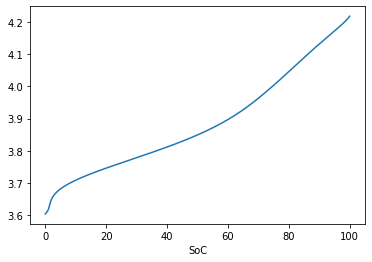

In [29]:
# ploting data keseluruhan
series.plot()

**PENJELASAN**

Dari hasil ploting diatas diketahui bahwa karakteristik data adalah *trend* yaitu pergerakan data yang stabil arahnya naik terus.

# **SPLIT DATA SET**

Disini saya membagi data menjadi dua yaitu untuk training dan testing, train = 80% dan test = 20%. 

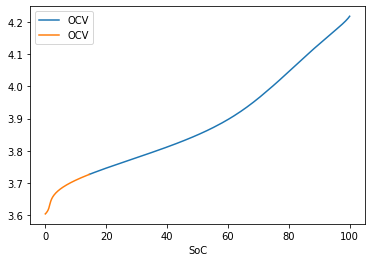

In [43]:
# split data
train =  df.iloc[:34776]
test = df.iloc[34776:]
n = len(series)
n_train = len(train)
n_test = len(test)

# plot untuk mengilustrasikan perbedaan train dan test set
fig, ax = pyplot.subplots() #OO Style
train.plot(ax=ax)
train
test.plot(ax=ax)


In [44]:
train.tail()

,OCV
SoC,
14.484123,3.726515
14.480347,3.726500
14.476555,3.726486
14.472748,3.726472
14.469002,3.726458


In [45]:
test.head()

,OCV
SoC,
14.465157,3.726444
14.461395,3.726430
14.457634,3.726416
14.453857,3.726402
14.450050,3.726387


# CREATE MODEL FORCASTING WITH **ARIMA**

In [56]:
import pmdarima as pm

# create automodel arima
# seasonal tidak ada pola musiman pada grafik
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=2,
                              start_q=0,
                              train = "adf",
                              seasonal= False,
                              trace= True,
                              stepwise=False)
    return automodel

In [57]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-766544.364, Time=14.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-768298.009, Time=27.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-769046.190, Time=76.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-764734.539, Time=44.41 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-766903.757, Time=57.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-761845.360, Time=77.95 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-766542.366, Time=20.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-767205.177, Time=30.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-767303.066, Time=38.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-763855.190, Time=53.45 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-765825.833, Time=65.99 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-766540.859, Time=29.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-767379.983, Time=41.55 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-766776.055, Time=47.11 sec
 ARIMA(2,1,3)(0,0,0)

**Best model:  ARIMA(0,1,2)**

# **DO FORECAST**

In [59]:
# mengetahui jumlah data test
test.shape

(8694, 1)

In [60]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


34776    3.726440
34777    3.726423
34778    3.726405
34779    3.726387
34780    3.726369
           ...   
43465    3.571619
43466    3.571601
43467    3.571583
43468    3.571566
43469    3.571548
Length: 8694, dtype: float64

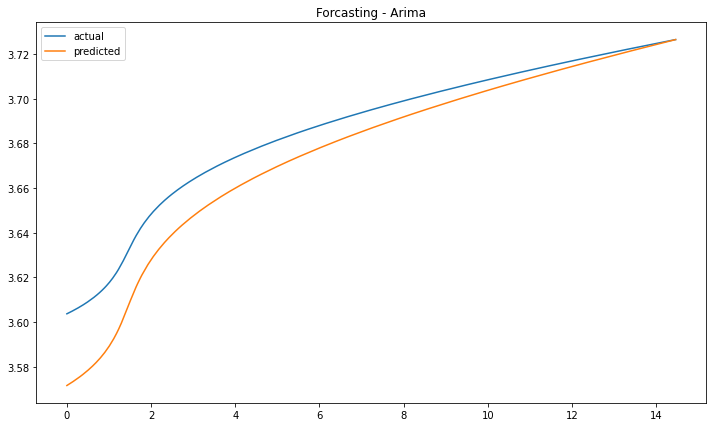

In [63]:
# plot untuk mengilustrasikan perbedaan actual dan predictons
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label = 'actual')
pyplot.plot(test.index, predictions_arima, label = 'predicted')
pyplot.title('Forcasting - Arima')
pyplot.legend()

Dari grafik diatas kita bisa ketahui bahwa hasil prediksi bagus karena semakin lama semakin dekat selisih antara nilai actaul dan predicted, permasalahnya pada awal bekerja hasil nilai predicted memiliki selisih yang sangat jauh dengan nilai actual. kesimpulanya metode automodel arima ini cukup bagus digunakan karena semakin lama selisih antara nilai actual dengan predicted semakin kecil.

In [71]:
predictions_arima.head()

34776    3.726440
34777    3.726423
34778    3.726405
34779    3.726387
34780    3.726369
dtype: float64

In [68]:
predictions_arima.tail()

43465    3.571619
43466    3.571601
43467    3.571583
43468    3.571566
43469    3.571548
dtype: float64

# **EValuate**

In [65]:
from math import sqrt

In [66]:
# Evaluate forecasts

rmse = sqrt(mean_squared_error(test, predictions_arima))
print('TEST RMSE: %.3f' % rmse)

TEST RMSE: 0.019


Hasil evalusai rmse menujukan bahwa forcanting yang sudah dilakukan ini mempunyai tingkat akurasi baguss dibuktikan dengan rmse 0,019 karena apbila hasil menunjukan nilai rmse besar forcasting tersebut mempunyai tingkat akurat yang rendah